# Initial EDA - Normal operating conditions (dataset 00)

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
pyo.init_notebook_mode(connected=True)

# import plotly_express as px

from ipywidgets import interact

In [2]:
import missingno as msno

In [3]:
file = 'd00'

In [4]:
# Reading files
d00_test = pd.read_csv('../data/'+file+'.dat', sep='\s+', header=None).T
d00_train = pd.read_csv('../data/'+file+'_te.dat', sep='\s+', header=None)

# Renaming columns (columns as integers is not good)
d00_test.columns = ['f'+str(i) for i in range(0,52)]
d00_train.columns = ['f'+str(i) for i in range(0,52)]

# Unifying dataset
d00 = pd.concat([d00_train, d00_test])

---
# Reproducing Belisário et al

### 1. Standardization

In [5]:
from sklearn.preprocessing import StandardScaler

In [59]:
df = pd.DataFrame(StandardScaler().fit_transform(d00_train), columns=d00_train.columns)

### 2. $\bar{X}$ vec

In [60]:
xbar = df.mean()

### 3. Cov matrix

In [61]:
df_cov = df.cov()

### 4. Eigenvectors (v) and Eigenvalues (w)

In [62]:
w,v = np.linalg.eig(df_cov)

### 5. Ranking values

In [63]:
df_rank = pd.DataFrame(v)
df_rank['autovalues'] = w
# df_rank['autovectors'] = [v]
df_rank = df_rank[['autovalues'] +list(df_rank.columns.drop('autovalues'))]
df_ranked = df_rank.sort_values('autovalues', ascending=False)
df_ranked['percent_explained_var'] = df_ranked['autovalues']/df_ranked['autovalues'].sum()

In [64]:
data = [go.Scatter(x = df_ranked.index+1, y = np.cumsum(df_ranked['percent_explained_var']), name = 'cumsum')]
layout = go.Layout(title = 'Cumsum of explained variance',
                   yaxis = dict(title = 'Explained variance (%)'),
                   xaxis = dict(title = 'Number of principal components'))
fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig, config=dict(showLink = False))

The threshold chosen by _Belisário et al._ was 55%, without any explanations presented. Therefore the number of PC's selected for the model is 11.

### 7. Determining LCS and 

---

### Sklearn PCA solution

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)

In [70]:
sum(pca.explained_variance_ratio_)

0.5550814101623748

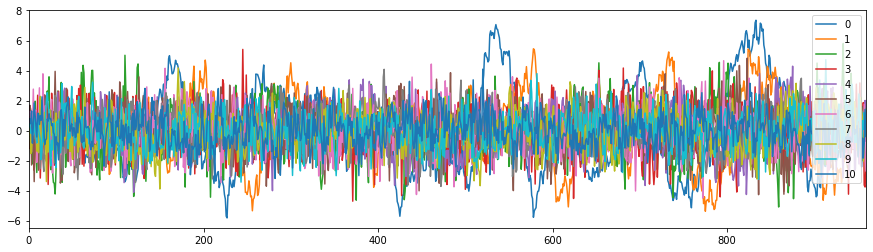

In [71]:
principalDf.plot(figsize = (15,4))

In [66]:
@interact(x = d00.columns)

def f(x):
    data = go.Scatter(x = d00_train.index, y= d00_train[x])
    layout = go.Layout(title = 'Feature '+x[1:], height=400, template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pyo.iplot(fig)

interactive(children=(Dropdown(description='x', options=('f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',…

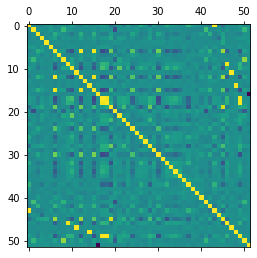

In [5]:
plt.matshow(d00.corr())

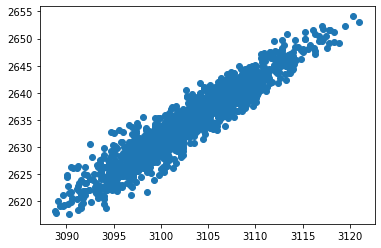

In [6]:
plt.scatter(d00['f15'],d00['f12'])

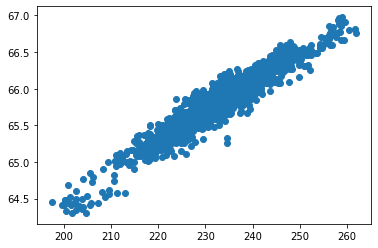

In [7]:
plt.scatter(d00['f18'],d00['f17'])

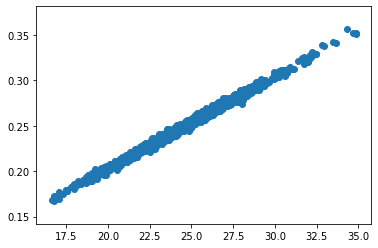

In [8]:
plt.scatter(d00['f43'],d00['f0'])

## Distributions

In [9]:
@interact(x = d00.columns)

def f(x):
    sns.distplot(d00[[x]])
    plt.title(x)
    plt.show()

interactive(children=(Dropdown(description='x', options=('f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',…

### Pandas profiling

In [10]:
# import pandas_profiling

# profile = d00.profile_report(title='Failure 0 Profile Report')
# profile.to_file(output_file="../reports/d00_report.html")

---